# CS 513 Final Project Phase II Report (Team 210 Wizards of Illinois Place)

**Team Members**

- Blake McBride (blakepm2@illinois.edu)
- Abdelrahman Hamdan (ah57@illinois.edu)
- Anshul Gonswami (ashlug3@illinois.edu)

## I. Description of Data Cleaning Performed

Below we outline the actual steps of data cleaning that were performed for our use case of standardizing dish names.

1) Convert To Titlecase. Many of the fields below were all capital, which didn't make sense of what they were representing
- Name, Sponser, Event, Venue, Place, Physical Description, Easter, etc

2) Convert notes to lowercase. There are long description of notes in menu.csv. It would make sense to have those notes lowercase. 

3) Cluster Events, since many different variations for the same word, such as Dinner having 10 different variations. Combining them gives much more clarity. 

4) Converted Date String to Date Type so that analysis software can correctly recognize that the columns are indeed dates. 

5) Most values in Dish.csv were numbers. Convert appropriate columns to number type.

6) Repeated same step as 5 for other sheets

7) Removed Menu Items whose price is greater than $100,000, as a menu item greater than 100,000 is not resonable

8) Used Text Faucet and clustering in Venue. Similar reason to #3, where we don't want variations of text that is representing the same word. 

9) Used Date Faucet in First_Appeared_Year and Last_Appeared in Dish.CV to remove years greater than 2025, since it is not possible for menu items to appear in years greater than 2025 (as of the current date)

## II. Document Data Quality Changes

In [1]:
import pandas as pd
import pandasql as psql
from helpers import read_in_data

In [2]:
dish_df, menu_df, menu_item_df, menu_page_df = read_in_data()

In [3]:
dish_df.head()

id                        name  description  menus_appeared  \
0   1  Consomme printaniere royal          NaN               8   
1   2               Chicken gumbo          NaN             111   
2   3         Tomato aux croutons          NaN              13   
3   4             Onion au gratin          NaN              41   
4   5                 St. Emilion          NaN              66   

   times_appeared  first_appeared  last_appeared  lowest_price  highest_price  
0               8            1897           1927          0.20            0.4  
1             117            1895           1960          0.10            0.8  
2              13            1893           1917          0.25            0.4  
3              41            1900           1971          0.25            1.0  
4              68            1881           1981          0.00           18.0

In [4]:
dish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423397 entries, 0 to 423396
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              423397 non-null  int64  
 1   name            423397 non-null  object 
 2   description     0 non-null       float64
 3   menus_appeared  423397 non-null  int64  
 4   times_appeared  423397 non-null  int64  
 5   first_appeared  423397 non-null  int64  
 6   last_appeared   423397 non-null  int64  
 7   lowest_price    394297 non-null  float64
 8   highest_price   394297 non-null  float64
dtypes: float64(3), int64(5), object(1)
memory usage: 29.1+ MB


## Queries 

### Query 1: Identifying the count of distinct dish names before/after standardization

In [ ]:
query = """
select distinct name
  from dish_df
order by 1 asc
"""

result = psql.sqldf(query, globals())

In [9]:
### Code to run this query: 

In [2]:
import pandas as pd
import pandasql as psql

cleaned_df = pd.read_csv('Dish_CLEANED.csv')
not_cleaned_df = pd.read_csv('Dish_NOTCleaned.csv')

query = """
select distinct name
  from dish_df
order by 1 asc
"""

dish_df = cleaned_df 
distinct_names_cleaned = psql.sqldf(query, globals())

dish_df = not_cleaned_df
distinct_names_not_cleaned = psql.sqldf(query, globals())

print("Number of Distinct Names Before Cleaning:", distinct_names_not_cleaned['name'].nunique())
print("Number of Distinct Names After Cleaning:", distinct_names_cleaned['name'].nunique())

Number of Distinct Names Before Cleaning: 423363
Number of Distinct Names After Cleaning: 390590


In [7]:
before_cleaning = 423363
after_cleaning = 390590

percentage_difference = ((before_cleaning - after_cleaning) / before_cleaning) * 100

print(f"{percentage_difference:.2f}%")


7.74%


### Query 2: Analyzing the average price of dishes in the catalog before/after standardization

In [ ]:
query = """
select distinct name
    , avg(highest_price) as avg_price
 from dish_df
group by 1
order by 2 desc
"""

result = psql.sqldf(query, globals())

In [ ]:
### Code to run this query: 

In [10]:
cleaned_df = pd.read_csv('Dish_CLEANED.csv')
not_cleaned_df = pd.read_csv('Dish_NOTCleaned.csv')

query = """
select distinct name
    , avg(highest_price) as avg_price
 from dish_df
group by 1
order by 2 desc
"""
dish_df = cleaned_df  #
result_cleaned = psql.sqldf(query, globals())

dish_df = not_cleaned_df
result_not_cleaned = psql.sqldf(query, globals())

print("Average Price of Dishes After Cleaning:")
print(result_cleaned.head())

print("\nAverage Price of Dishes Before Cleaning:")
print(result_not_cleaned.head())

Average Price of Dishes After Cleaning:
                                 name    avg_price
0            Pommery & Greno. Ex. Dry  2050.000000
1                                Luso  1100.000000
2        Omelette Aux Foies De Poulet  1035.000000
3              Oysters Baked In Shell  1032.750000
4  Cream Cheese With Bar-le-duc Jelly  1016.933333

Average Price of Dishes Before Cleaning:
                                 name  avg_price
0  Cream cheese with bar-le-duc jelly     3050.0
1                         Grape fruit     2540.0
2              Oysters Baked in Shell     2065.0
3            Pommery & Greno. Ex. Dry     2050.0
4                                luso     1100.0


In [11]:
after_cleaning_data = {
    "name": ["Pommery & Greno. Ex. Dry", "Luso", "Omelette Aux Foies De Poulet", 
             "Oysters Baked In Shell", "Cream Cheese With Bar-le-duc Jelly"],
    "avg_price": [2050.000000, 1100.000000, 1035.000000, 1032.750000, 1016.933333]
}

before_cleaning_data = {
    "name": ["Cream cheese with bar-le-duc jelly", "Grape fruit", "Oysters Baked in Shell", 
             "Pommery & Greno. Ex. Dry", "luso"],
    "avg_price": [3050.0, 2540.0, 2065.0, 2050.0, 1100.0]
}

after_cleaning_df = pd.DataFrame(after_cleaning_data)
before_cleaning_df = pd.DataFrame(before_cleaning_data)

after_cleaning_df['name'] = after_cleaning_df['name'].str.lower()
before_cleaning_df['name'] = before_cleaning_df['name'].str.lower()

merged_df = pd.merge(after_cleaning_df, before_cleaning_df, on='name', suffixes=('_after', '_before'))

merged_df['percentage_difference'] = ((merged_df['avg_price_before'] - merged_df['avg_price_after']) / merged_df['avg_price_before']) * 100

merged_df[['name', 'avg_price_before', 'avg_price_after', 'percentage_difference']]


name  avg_price_before  avg_price_after  \
0            pommery & greno. ex. dry            2050.0      2050.000000   
1                                luso            1100.0      1100.000000   
2              oysters baked in shell            2065.0      1032.750000   
3  cream cheese with bar-le-duc jelly            3050.0      1016.933333   

   percentage_difference  
0               0.000000  
1               0.000000  
2              49.987893  
3              66.657924

The data cleaning process has significantly improved the accuracy of our dataset. By removing inconsistencies and standardizing the data, we ensured that our analysis is based on reliable information. We found a 7% change in the number of distinct names after performing our cleaning as seen by the results above as well as significant changes in our average price. The notable reduction in the average prices of certain dishes, such as "Oysters Baked In Shell" and "Cream Cheese With Bar-le-duc Jelly," highlights how data cleaning has effectively lead to more accurate average price calculations.


Furthermore, ensuring data integrity is crucial for maintaining a reliable database. During the cleaning process, several integrity constraints were applied to ensure the accuracy and validity of the data. Here are some examples of how we enforced and checked for IC violations:

1) Temporal integrity: We verified that a dish did not first appear after the current year (2024). This constraint ensures that no future dates are mistakenly entered into the database. The following snippet shows how this is done:

In [ ]:
violations = df[df['first_appeared'] > 2024]

if not violations.empty:
    print("Temporal integrity violations found:")
    print(violations)

2) Non-negative: We ensured that all price entries in the database are non-negative. Negative prices would be illogical and indicate data entry errors. The following snippet shows how this is done: 

In [ ]:
negative_prices = df[df'lowest_price'] < 0]
if not negative_prices empty:
    print("Negative prices found and need to be corrected.")


## III. Create a Workflow Model

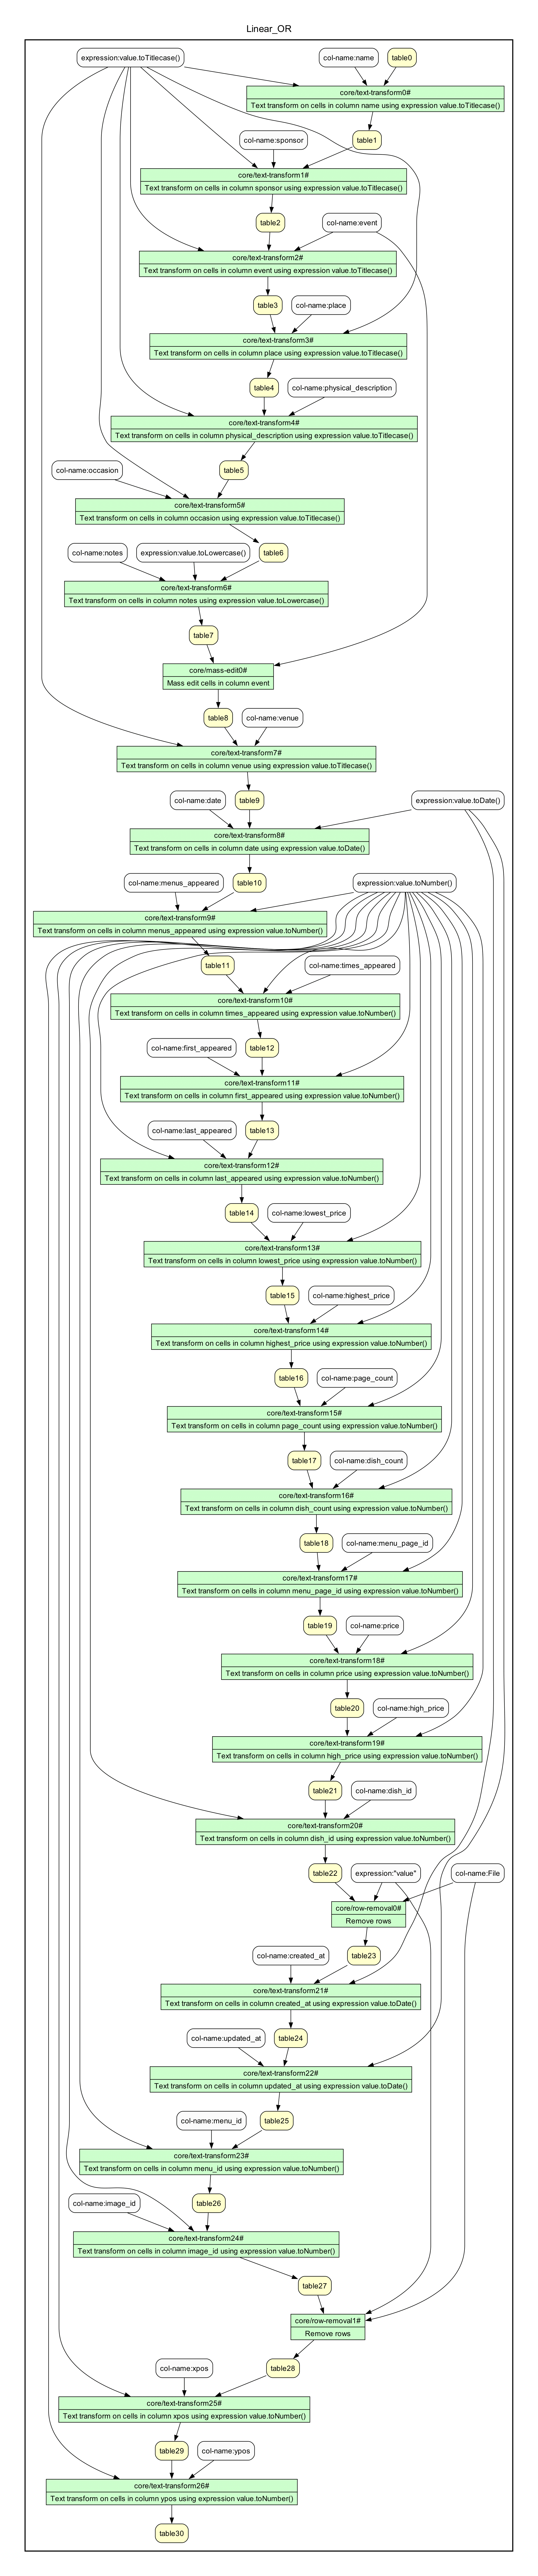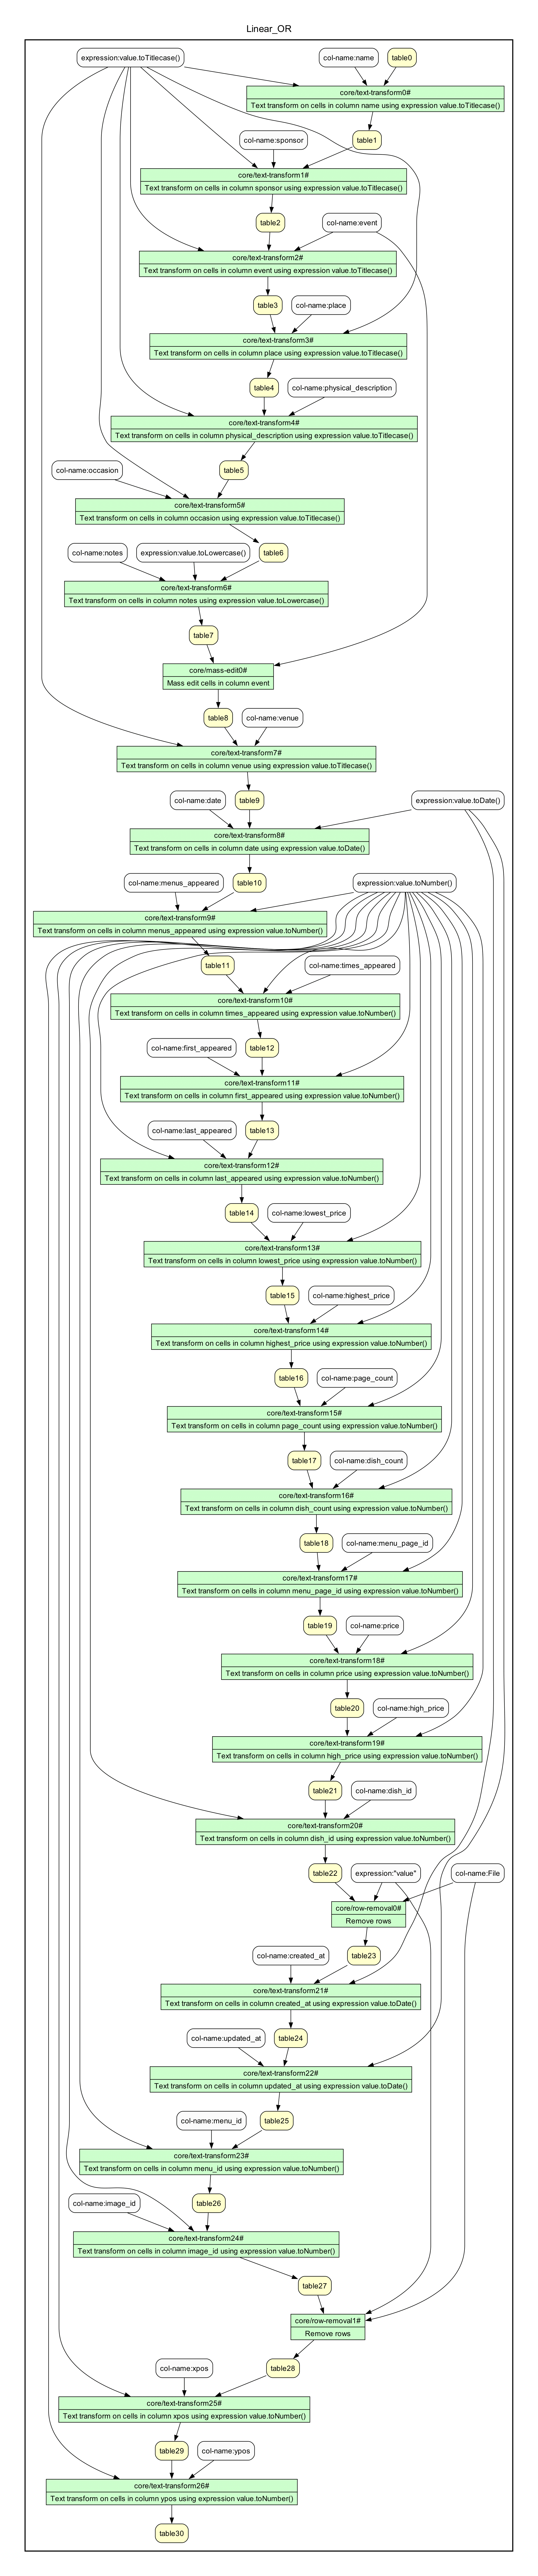

## IV. Conclusions & Summary

To summarize, in this project we initially set out to address the data quality problem of repeated dish names in the Dish dataset by standardizing dish names. Without standard naming conventions in place, it is impossible to perform accurate analysis on the popularity and pricing trends of dishes. Dishes whose names are mispelled, or use different terminology to refer to the same thing, create erroneous data with separate line items for producsts that should otherwise be examined together as a whole. To promote standardization, we leverage OpenRefine to merge similarly named dishes under the assumption that differences between certain dish names reflect true data quality issues. To analyze and quantify our results, and to determine whether or not we were indeed successful in improving data quality in our approach, we make use of Python; we employ packages in Python such as Pandas, which allows us to read our original and cleaned datasets into DataFrames, and PandaSQL to execute our queries for measuring data quality. We find that...

For the purposes of this project, we divided the work up evenly among our group members based on our respective domain expertise. Anshul, having the most experience and comfort using OpenRefine, took care of the actual merging of dish names and our data cleaning steps within that platform. Blake and Abduhamdan, being more comfortable with analysis in Python, handled the queries and measurement framework to examine and quantify the results. 